C:\Users\Rawan\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Rawan\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\Rawan\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


modal number of moves: 19


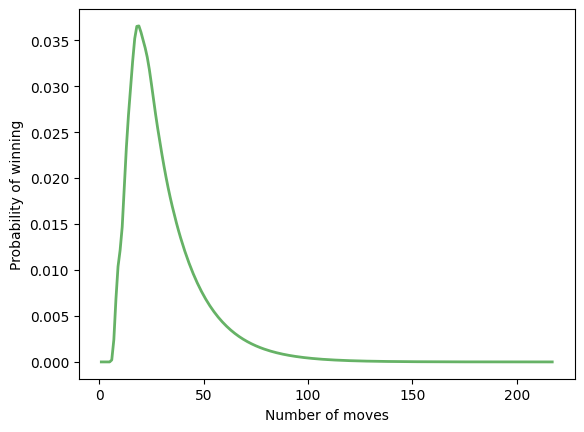

In [2]:
import numpy as np
import matplotlib.pyplot as plt

ladders = [(3,19), (15,37), (22,42), (25,64), (41,73),
           (53,74), (63,86), (76,91), (84,98)]
snakes = [(11,7), (18,13), (28,12), (36,34), (77,16),
          (47,26), (83,39), (92,75), (99,70)]
trans = ladders + snakes

# Set up the transition matrix
T = np.zeros((101, 101))
for i in range(1,101):
    T[i-1,i:i+6] = 1/6

for (i1,i2) in trans:
    iw = np.where(T[:,i1] > 0)
    T[:,i1] = 0
    T[iw,i2] += 1/6

# House rules: you don't need to land on 100, just reach it.
T[95:100,100] += np.linspace(1/6, 5/6, 5)
for snake in snakes:
    T[snake,100] = 0

# The player starts at position 0.
v = np.zeros(101)
v[0] = 1

n, P = 0, []
cumulative_prob = 0
# Update the state vector v until the cumulative probability of winning
# is "effectively" 1
while cumulative_prob < 0.99999:
    n += 1
    v = v.dot(T)
    P.append(v[100])
    cumulative_prob += P[-1]
mode = np.argmax(P)+1
print('modal number of moves:', mode)

# Plot the probability of winning as a function of the number of moves
fig, ax = plt.subplots()
ax.plot(np.linspace(1,n,n), P, 'g-', lw=2, alpha=0.6, label='Markov')
ax.set_xlabel('Number of moves')
ax.set_ylabel('Probability of winning')

plt.show()



modal number of moves: 29


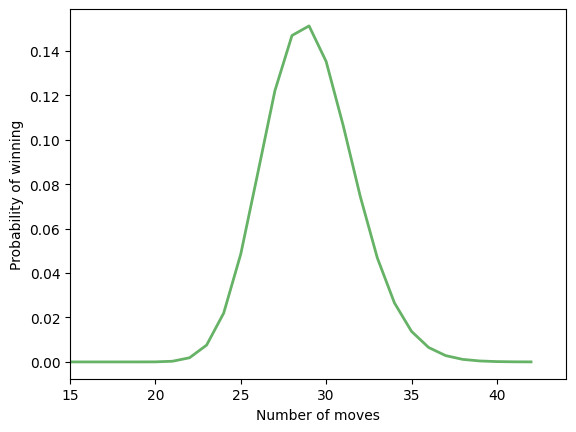

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Set up the transition matrix
T = np.zeros((101, 101))
for i in range(1,101):
    T[i-1,i:i+6] = 1/6

# House rules: you don't need to land on 100, just reach it.
T[95:100,100] += np.linspace(1/6, 5/6, 5)

# The player starts at position 0.
v = np.zeros(101)
v[0] = 1

n, P = 0, []
cumulative_prob = 0
# Update the state vector v until the cumulative probability of winning
# is "effectively" 1
while cumulative_prob < 0.99999:
    n += 1
    v = v.dot(T)
    P.append(v[100])
    cumulative_prob += P[-1]
mode = np.argmax(P)+1
print('modal number of moves:', mode)

# Plot the probability of winning as a function of the number of moves
fig, ax = plt.subplots()
ax.plot(np.linspace(1,n,n), P, 'g', lw=2, alpha=0.6)
ax.set_xlim(15)
ax.set_xlabel('Number of moves')
ax.set_ylabel('Probability of winning')

plt.show()
